<a href="https://colab.research.google.com/github/bb20417/CE888/blob/main/Project/tweetClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import important libraries

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
import csv
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns
import re
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer
from sklearn import svm



In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud


My chosen datasets are: **Offensive language identification, Hate speech detection and Emotion recongnition**

# Loading all the datasets.

Total 21 datasets

## Loading *Emotion datasets*

In [ ]:

#traindf=pd.read_csv('../input/semeval-2018-task-ec/2018-E-c-En-train.txt',encoding='utf-8',sep="\t")
emo_train_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_text.txt",encoding='utf-8',sep="\t", header=None)
emo_train_text.columns= ["tweet_text"]
emo_train_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_labels.txt",encoding='utf-8',sep="\t", header=None)
emo_train_label.columns= ["tweet_label"]


emo_val_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_text.txt",encoding='utf-8',sep="\t", header=None)
emo_val_text.columns= ["tweet_text"]
emo_val_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_labels.txt",encoding='utf-8',sep="\t", header=None)
emo_val_label.columns= ["tweet_label"]

emo_test_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_text.txt",encoding='utf-8',sep="\t", header=None)
emo_test_text.columns= ["tweet_text"]
emo_test_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_labels.txt",encoding='utf-8',sep="\t", header=None)
emo_test_label.columns= ["tweet_label"]

emo_map = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/mapping.txt",encoding='utf-8',sep="\t", header=None)
emo_map.columns= ["tweet_label","emotion"]


## Loading *Hate datasets*

In [ ]:
#loading Hate speech data
hate_train_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_text.txt", sep="\t", quoting=csv.QUOTE_NONE, skip_blank_lines=False, header=None)
hate_train_text.columns= ["tweet_text"]
hate_train_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/train_labels.txt",encoding='utf-8',sep="\n", header=None)
hate_train_label.columns= ["tweet_label"]


hate_val_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_text.txt",sep="\t", quoting=csv.QUOTE_NONE, skip_blank_lines=False, header=None)
hate_val_text.columns= ["tweet_text"]
hate_val_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/val_labels.txt",encoding='utf-8',sep="\t", header=None)
hate_val_label.columns= ["tweet_label"]

hate_test_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_text.txt",sep="\t", quoting=csv.QUOTE_NONE, skip_blank_lines=False, header=None)
hate_test_text.columns= ["tweet_text"]
hate_test_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/test_labels.txt",encoding='utf-8',sep="\t", header=None)
hate_test_label.columns= ["tweet_label"]

hate_map = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/hate/mapping.txt",encoding='utf-8',sep="\t", header=None)
hate_map.columns= ["tweet_label","isHate"]

## Loading *Offensive datasets*

In [ ]:
#loading offensive data
off_train_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_text.txt",encoding='utf-8',sep="\t", header=None)
off_train_text.columns= ["tweet_text"]
off_train_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_labels.txt",encoding='utf-8',sep="\t", header=None)
off_train_label.columns= ["tweet_label"]


off_val_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_text.txt",encoding='utf-8',sep="\t", header=None)
off_val_text.columns= ["tweet_text"]
off_val_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_labels.txt",encoding='utf-8',sep="\t", header=None)
off_val_label.columns= ["tweet_label"]

off_test_text = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_text.txt",encoding='utf-8',sep="\t", header=None)
off_test_text.columns= ["tweet_text"]
off_test_label = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_labels.txt",encoding='utf-8',sep="\t", header=None)
off_test_label.columns= ["tweet_label"]


off_map = pd.read_csv("https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/mapping.txt",encoding='utf-8',sep="\t", header=None)
off_map.columns= ["tweet_label","offensive"]

# Cleaning methods used by all datasets

In [ ]:
def clean_tweet(text):
  # "- Removing HTML tags
  #   - Removing punctuation
  #   - Lowering text
  #   "
  # remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)    
    
    # convert text to lowercase
    text = text.strip().lower()
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    return text


#clean_tweet("<div>This is not a sentence.<\div>").split()




In [ ]:
# Tokenizing tweets function used by all datasets
def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_tweet(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [ ]:
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)



# **Emotion** dataset

## *Preprocessing*


In [ ]:
#concatenating dataframe by columns to make one dataset each for train, validation and test df
df_emo_train = pd.concat([emo_train_text,emo_train_label], axis=1)
df_emo_val = pd.concat([emo_val_text,emo_val_label], axis=1)
df_emo_test = pd.concat([emo_test_text,emo_test_label], axis=1)

In [ ]:
#joining mapping dataset with train, validation and test datasets
emo_combo_train = pd.merge(df_emo_train,emo_map, on='tweet_label')
emo_combo_val = pd.merge(df_emo_val,emo_map, on='tweet_label')
emo_combo_test = pd.merge(df_emo_test,emo_map, on='tweet_label')

In [ ]:
# concatenating train and validation datasets by row to make one complete training data
emo_train_val = pd.concat([emo_combo_train,emo_combo_val])

In [ ]:
train_emo = emo_train_val.copy()
train_emo['text_clean'] = train_emo['tweet_text'].apply(str).apply(lambda x: text_preprocessing(x))




In [ ]:
#removing workds like user and amp in clean tweets
train_emo['text_clean'] = train_emo['text_clean'].str.replace('user','')
train_emo['text_clean'] = train_emo['text_clean'].str.replace('amp','')
train_emo

## *Visualization*

In [ ]:
g = (sns.catplot(x="emotion", kind="count", palette="ch:.25", data=emo_combo_train))
g.fig.suptitle("Training set", y=1.03)
plt.show()

v = sns.catplot(x="emotion", kind="count", palette="ch:.25", data=emo_combo_val)
v.fig.suptitle("Validation set", y=1.03)
plt.show()

t = sns.catplot(x="emotion", kind="count", palette="ch:.25", data=emo_combo_test)
t.fig.suptitle("Test set", y=1.03)
plt.show()



all the three datasets are similarly unbalanced.

**Wordclouds**

In [ ]:
#creating different datasets for different emotions
emo_sad = train_emo[train_emo['emotion'] == 'sadness']['text_clean']
emo_anger = train_emo[train_emo['emotion'] == 'anger']['text_clean']
emo_joy = train_emo[train_emo['emotion'] == 'joy']['text_clean']
emo_opt = train_emo[train_emo['emotion'] == 'optimism']['text_clean']

In [ ]:
emo_sad

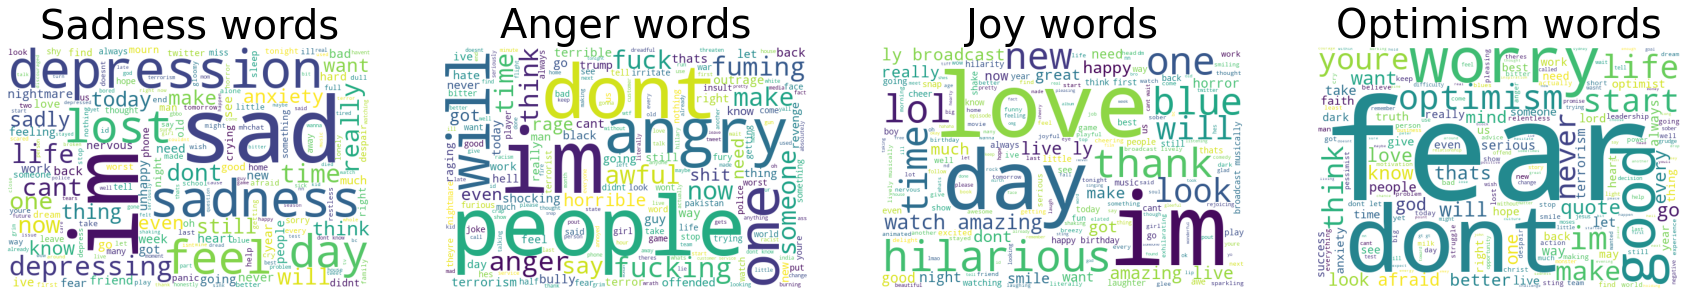

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[30, 15])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emo_sad))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Sadness words',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emo_anger))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Anger words',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emo_joy))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Joy words',fontsize=40);

wordcloud4 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(emo_opt))
ax4.imshow(wordcloud4)
ax4.axis('off')
ax4.set_title('Optimism words',fontsize=40);



# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# plt.show() 

We need better cleaning of texts so it does not include words like "user" and "amp"

## *Training* the model and testing with macro averaged F1 score as evaluation metric.

**cleaning** the data and then using Linear SVM for inital training and testing

https://link.springer.com/chapter/10.1007/978-0-387-34747-9_18#enumeration

https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5459006



Using BOW vectorizer from Python with countvectorizer from scikitlearn

In [ ]:
vectorizer = CountVectorizer(stop_words="english",preprocessor=clean_tweet)

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"]) 
test_features = vectorizer.transform(emo_combo_test["tweet_text"])
model = LinearSVC()
model.fit(training_features,emo_train_val["emotion"])
y_pred = model.predict(test_features)

score = f1_score(emo_combo_test["emotion"], y_pred, average='macro')
print("F1 Score on emotion dataset: {}".format(round(score*100,2)))

F1 Score on emotion dataset: 61.4


Taking n-gram: 

https://link.springer.com/chapter/10.1007/3-540-36618-0_24
https://www.researchgate.net/publication/2375544_N-Gram-Based_Text_Categorization



In [ ]:
# modeling with countvectorizer and bigrams
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"])    
test_features = vectorizer.transform(emo_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, emo_train_val["emotion"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(emo_combo_test["emotion"], y_pred,average='macro')

print("Accuracy on the IMDB dataset: {:.2f}".format(score*100))


Accuracy on the IMDB dataset: 61.46


bigram also gave same result. next checking TF-IDF  vectorizer  with bigram

In [ ]:
# modeling with TF-IDF and bigrams
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"])    
test_features = vectorizer.transform(emo_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, emo_train_val["emotion"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(emo_combo_test["emotion"], y_pred,average='macro')

print("Accuracy on the IMDB dataset: {:.2f}".format(score*100))


Accuracy on the IMDB dataset: 62.61


NOT  huge difference. Now trying the cleaning process given by tweeteval repository

In [ ]:
# cleaning with process suggested by tweeteval  and then vectorizing with TF-IDF and bigrams to train emotion dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"])    
test_features = vectorizer.transform(emo_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, emo_train_val["emotion"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(emo_combo_test["emotion"], y_pred,average='macro')

print("Accuracy Emotion dataset: {:.2f}".format(score*100))

Accuracy Emotion dataset: 61.35


In [ ]:
#cleaning with process suggested by tweeteval  and then vectorizing with countvectorizer with bigrams to train emotion dataset by SVM

vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(emo_train_val["tweet_text"])    
test_features = vectorizer.transform(emo_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, emo_train_val["emotion"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(emo_combo_test["emotion"], y_pred,average='macro')

print("Accuracy on the emotion dataset: {:.2f}".format(score*100))

Accuracy on the emotion dataset: 61.46


# **Hate Speech** dataset

## *Preprocessing*


In [ ]:
#concatenating dataframe to make one dataset each for train, validation and test df
df_hate_train = pd.concat([hate_train_text,hate_train_label], axis=1)
df_hate_val = pd.concat([hate_val_text,hate_val_label], axis=1)
df_hate_test = pd.concat([hate_test_text,hate_test_label], axis=1)

In [ ]:
hate_combo_train = pd.merge(df_hate_train,hate_map, on='tweet_label')
hate_combo_val = pd.merge(df_hate_val,hate_map, on='tweet_label')
hate_combo_test = pd.merge(df_hate_test,hate_map, on='tweet_label')

In [ ]:
hate_train_val = pd.concat([hate_combo_train, hate_combo_val])

In [ ]:
train_hate = hate_train_val.copy()
train_hate['text_clean'] = train_hate['tweet_text'].apply(str).apply(lambda x: text_preprocessing(x))

In [ ]:
#removing workds like user and amp in clean tweets
train_hate['text_clean'] = train_hate['text_clean'].str.replace('user','')
train_hate['text_clean'] = train_hate['text_clean'].str.replace('amp','')
train_hate

## *Visualization*

In [ ]:
#creating different datasets for different emotions
hate_yes = train_hate[train_hate['isHate'] == 'hate']['text_clean']
hate_no = train_hate[train_hate['isHate'] == 'not-hate']['text_clean']


In [ ]:
g = (sns.catplot(x="isHate", kind="count", palette="ch:.25", data=hate_combo_train))
g.fig.suptitle("Training set", y=1.03)
plt.show()

v = sns.catplot(x="isHate", kind="count", palette="ch:.25", data=hate_combo_val)
v.fig.suptitle("Validation set", y=1.03)
plt.show()

t = sns.catplot(x="isHate", kind="count", palette="ch:.25", data=hate_combo_test)
t.fig.suptitle("Test set", y=1.03)
plt.show()


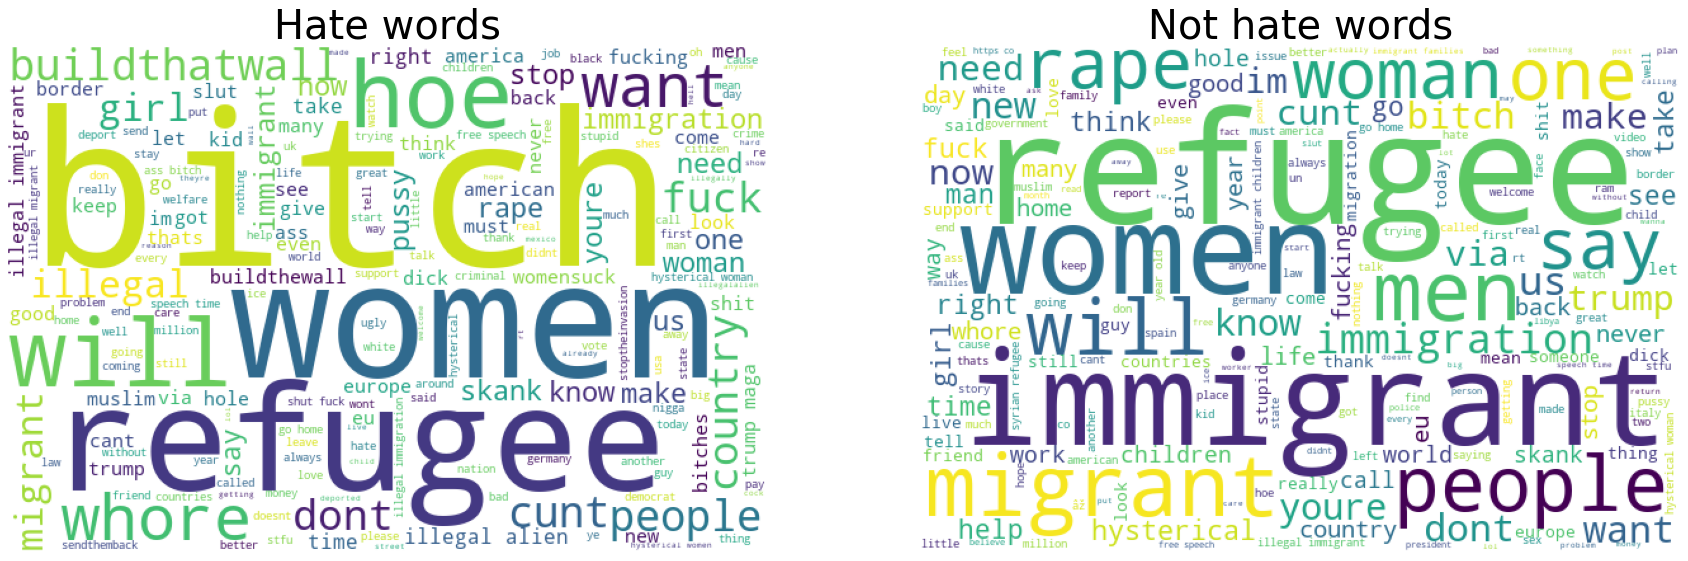

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(hate_yes))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Hate words',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(hate_no))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Not hate words',fontsize=40);





# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# plt.show() 

## *Training* the model and testing with macro averaged F1 score as evaluation metric.

In [ ]:
total =0
for n in pd.isna(hate_train_val["tweet_text"]):
  if n==True:
    total = total+1
total

8

In [ ]:
hate_train_val.dropna(inplace=True) #dropping the empty tweets, total 8, as they were included during the reading part
hate_combo_test.dropna(inplace=True)

In [ ]:
vectorizer = CountVectorizer(stop_words="english",preprocessor=clean_tweet)
training_features = vectorizer.fit_transform(hate_train_val["tweet_text"])  # feature extraction of train and validation set
test_features = vectorizer.transform(hate_combo_test["tweet_text"]) #feature extraction of test set
model = LinearSVC()
model.fit(training_features,hate_train_val["isHate"])
y_pred = model.predict(test_features)

score = f1_score(hate_combo_test["isHate"], y_pred, average='macro')
print("F1 Score on hate detection dataset: {}".format(round(score*100,2)))


F1 Score on hate detection dataset: 49.37


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# cleaning with basic clean funtion  and then vectorizing with TF-IDF and bigrams for Hate dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(hate_train_val["tweet_text"])    
test_features = vectorizer.transform(hate_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, hate_train_val["isHate"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(hate_combo_test["isHate"], y_pred,average='macro')

print("Accuracy on the Hate dataset: {:.2f}".format(score*100))

Accuracy on the Hate dataset: 39.54


In [ ]:
# cleaning with proecss suggested by tweeteval  and then vectorizing with TF-IDF and bigrams hate dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(hate_train_val["tweet_text"])    
test_features = vectorizer.transform(hate_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, hate_train_val["isHate"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(hate_combo_test["isHate"], y_pred,average='macro')

print("Accuracy on the Hate detection dataset: {:.2f}".format(score*100))

Accuracy on the Hate detection dataset: 41.38


In [ ]:
# cleaning with proecss suggested by tweeteval  and then vectorizing with countvectorizer and bigrams hate dataset
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(hate_train_val["tweet_text"])    
test_features = vectorizer.transform(hate_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, hate_train_val["isHate"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(hate_combo_test["isHate"], y_pred,average='macro')

print("Accuracy on the Hate detection dataset: {:.2f}".format(score*100))

Accuracy on the Hate detection dataset: 47.36


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best score is generated with countvectorizer, basic cleaning and wothout bigrams



# **Offensive** dataset 

## *Preprocessing*


In [ ]:
#concatenating dataframe to make one dataset each for train, validation and test df
df_off_train = pd.concat([off_train_text,off_train_label], axis=1)
df_off_val = pd.concat([off_val_text,off_val_label], axis=1)
df_off_test = pd.concat([off_test_text,off_test_label], axis=1)

In [ ]:
off_combo_train = pd.merge(df_off_train,off_map, on='tweet_label')
off_combo_val = pd.merge(df_off_val,off_map, on='tweet_label')
off_combo_test = pd.merge(df_off_test,off_map, on='tweet_label')

In [ ]:
off_train_val = pd.concat([off_combo_train,off_combo_val])

In [ ]:
train_off = off_train_val.copy()
train_off['text_clean'] = train_off['tweet_text'].apply(str).apply(lambda x: text_preprocessing(x))

In [ ]:
#removing workds like user and amp in clean tweets
train_off['text_clean'] = train_off['text_clean'].str.replace('user','')
train_off['text_clean'] = train_off['text_clean'].str.replace('amp','')
train_off

,tweet_text,tweet_label,offensive,text_clean
0,@user Bono... who cares. Soon people will unde...,0,not-offensive,bono who cares soon people will understand th...
1,@user Get him some line help. He is gonna be j...,0,not-offensive,get him some line help he is gonna be just fi...
2,@user @user She is great. Hi Fiona!,0,not-offensive,she is great hi fiona
3,@user @user @user @user @user @user @user @use...,0,not-offensive,this is the vetsresistsquadron ...
4,@user @user Lol. Except he’s the most successf...,0,not-offensive,lol except he s the most successful presiden...
...,...,...,...,...
1319,@user @user @user Weak argument considering -...,1,offensive,weak argument considering gop congressmen w...
1320,@user Stop saying this shit you are not going ...,1,offensive,stop saying this shit you are not going to do...
1321,@user @user @user @user @user Sorry to break i...,1,offensive,sorry to break it to you but the god of t...
1322,. she. is the most powerful woman on this eart...,1,offensive,she is the most powerful woman on this earth o...


## *Visualization*

In [ ]:
#creating different datasets for different emotions
off_yes = train_off[train_off['offensive'] == 'offensive']['text_clean']
off_no = train_off[train_off['offensive'] == 'not-offensive']['text_clean']


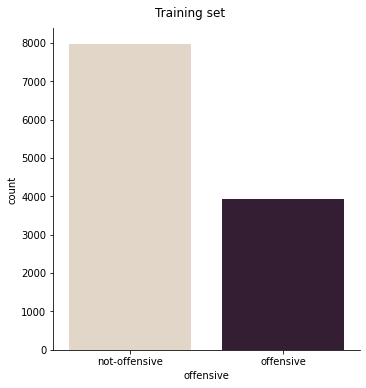

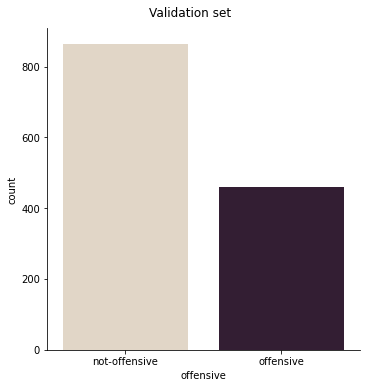

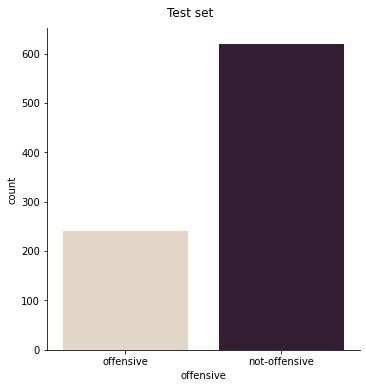

In [ ]:
g = (sns.catplot(x="offensive", kind="count", palette="ch:.25", data=off_combo_train))
g.fig.suptitle("Training set", y=1.03)
plt.show()

v = sns.catplot(x="offensive", kind="count", palette="ch:.25", data=off_combo_val)
v.fig.suptitle("Validation set", y=1.03)
plt.show()

t = sns.catplot(x="offensive", kind="count", palette="ch:.25", data=off_combo_test)
t.fig.suptitle("Test set", y=1.03)
plt.show()


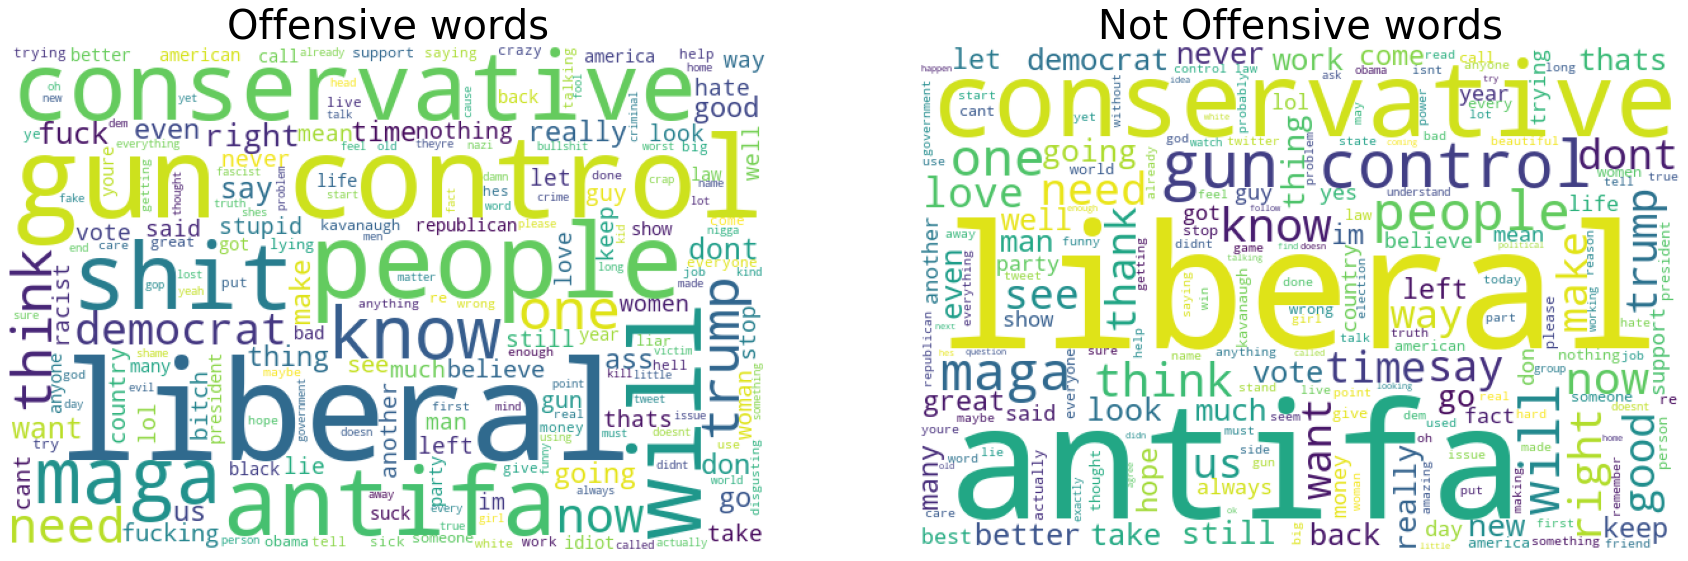

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(off_yes))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Offensive words',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(off_no))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Not Offensive words',fontsize=40);





# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
# plt.show() 

## *Training* the model and testing with macro averaged F1 score as evaluation metric.

In [ ]:
vectorizer = CountVectorizer(stop_words="english",preprocessor=clean_tweet)

training_features = vectorizer.fit_transform(off_train_val["tweet_text"])  # feature extraction of train and validation set
test_features = vectorizer.transform(off_combo_test["tweet_text"]) #feature extraction of test set

In [ ]:

model = LinearSVC()
model.fit(training_features,off_train_val["offensive"])
y_pred = model.predict(test_features)

score = f1_score(off_combo_test["offensive"], y_pred, average='macro')
print("F1 Score on offensive language dataset: {}".format(round(score*100,2)))

F1 Score on offensive language dataset: 70.65


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# cleaning with basic clean funtion  and then vectorizing with TF-IDF and bigrams for Offensive dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_tweet,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(off_train_val["tweet_text"])    
test_features = vectorizer.transform(off_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, off_train_val["offensive"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(off_combo_test["offensive"], y_pred,average='macro')

print("Accuracy on the offensive language dataset: {:.2f}".format(score*100))

Accuracy on the offensive language dataset: 74.00


In [ ]:
# cleaning with  clean funtion given by tweeteval  and then vectorizing with countvectorizer and bigrams for Offensive dataset
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(off_train_val["tweet_text"])    
test_features = vectorizer.transform(off_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, off_train_val["offensive"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(off_combo_test["offensive"], y_pred,average='macro')

print("Accuracy on the offensive language dataset: {:.2f}".format(score*100))

Accuracy on the offensive language dataset: 71.84


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# cleaning with clean funtion given by tweeteval  and then vectorizing with TF-IDF and bigrams for Offensive dataset
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=preprocess,
                             ngram_range=(1, 2))

training_features = vectorizer.fit_transform(off_train_val["tweet_text"])    
test_features = vectorizer.transform(off_combo_test["tweet_text"])

# Training
model = LinearSVC()
model.fit(training_features, off_train_val["offensive"])
y_pred = model.predict(test_features)

# Evaluation
score = f1_score(off_combo_test["offensive"], y_pred,average='macro')

print("Accuracy on the offensive language dataset: {:.2f}".format(score*100))

Accuracy on the offensive language dataset: 73.17


cleaning with basic clean funtion  and then vectorizing with TF-IDF and bigrams for Offensive dataset gives best score

# Further work

* Use Bert pre trained Model
* For preprocessing, use text embedding as suggested by Tweeteval
